<a href="https://colab.research.google.com/github/RaulMedeiros/plots/blob/master/Stack_bar_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['fivethirtyeight','seaborn-whitegrid'])

pal = [(0.0, 0.5607843137254902, 0.8352941176470589),
       (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
       (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
       (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
       (0.5058823529411764, 0.058823529411764705, 0.48627450980392156),
       (0.5450980392156862, 0.5450980392156862, 0.5450980392156862)]

In [46]:
import numpy as np
import pandas as pd


def get_data(max_value=100):
  return pd.DataFrame.from_dict(data={
    'col_1': ['AA', 'BB',
              'CC', 'DD'],
    'col_2': [np.random.randint(max_value), np.random.randint(max_value),
              np.random.randint(max_value), np.random.randint(max_value)],
    'col_3': [np.random.randint(max_value), np.random.randint(max_value),
              np.random.randint(max_value), np.random.randint(max_value)],
    'col_4': [np.random.randint(max_value), np.random.randint(max_value),
              np.random.randint(max_value), np.random.randint(max_value)],
    'col_5': [np.random.randint(max_value), np.random.randint(max_value),
              np.random.randint(max_value), np.random.randint(max_value)],
  })

df_src = get_data()
# df = df.set_index('col_1')
df_src

,col_1,col_2,col_3,col_4,col_5
0,AA,23,70,61,96
1,BB,48,88,35,96
2,CC,8,38,40,92
3,DD,18,62,17,9


In [0]:
# import matplotlib.pyplot as plt
import seaborn as sns

def get_data(df, index_col, value_col_list, normalize):
    if not index_col:
        index_col = df.index.name
        df = df.reset_index()
        
    if not value_col_list:
        value_col_list = list(df.columns)
        del value_col_list[value_col_list.index(index_col)]

    y = df[index_col].values
    X = df[value_col_list].T.values

    if normalize:
        X = X*100/np.sum(X, axis=0)
    return X, y, value_col_list


def stack_bar_plot(df, index_col=None, value_col_list=None, normalize=True, 
                   title="", figsize=(15,3), fontsize=20, legend=False,
                   legend_bbox_to_anchor=(0.5, 1.25), colors=pal):
    
    X, y, value_col_list = get_data(df, index_col, value_col_list, normalize)    
    fig = plt.figure(figsize=figsize)

    for i, x in enumerate(X):
        if i == 0:
            left=[0]*len(df.index)
        else:
            left = np.sum(X[:i], axis=0)
        plt.barh(y=y, width=x, left=left, alpha=0.7, color=colors[i])

        for y_idx, y_col in enumerate(y):
            msg = f"{int(x[y_idx])}"
            if normalize:
                msg+="%"

            # set the text position ate the center of each bar    
            x_halfbar = left[y_idx] + x[y_idx]/2 
            
            plt.text(
                x=x_halfbar, 
                y=y[y_idx],
                s=msg,
                fontsize=fontsize,
                color="white",
                horizontalalignment='center',
                verticalalignment='center'
            )

    if legend:
      plt.legend(
          labels=value_col_list,
          ncol=len(value_col_list),
          bbox_to_anchor=legend_bbox_to_anchor,
          loc='upper center',
          fontsize=18
      )
        
    sns.despine(left=True, bottom=True)
    plt.title(label=title, fontsize=24, pad=10)
    plt.grid(False)
    plt.show()

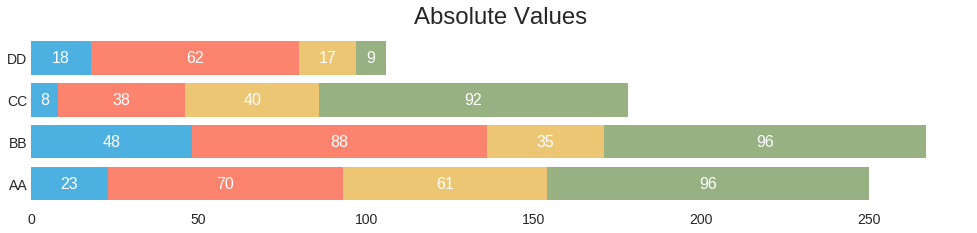

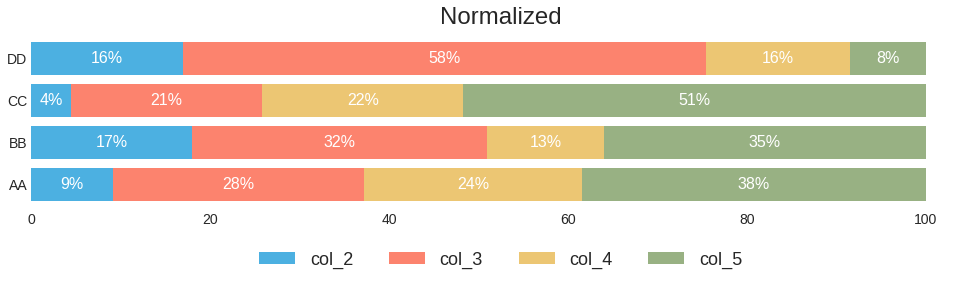

In [58]:

# Case 1
stack_bar_plot(
  df=df_src,
  index_col='col_1',
  normalize=False,
  fontsize=16,
  title="Absolute Values"
)

# Case 2
stack_bar_plot(
    df=df_src,
    index_col='col_1',
    normalize=True,
    title = "Normalized",
    fontsize=16,
    legend=True,
    legend_bbox_to_anchor=(0.5, -0.15)
)